<img src="idal-logo.png" align="right" style="float" width="300">
<font color="#CA3532"><h1 align="left">Máster en Inteligencia Artificial Avanzada y Aplicada.</h1></font>
<font color="#6E6E6E"><h2 align="left">Herramientas de AI: probabilidad.</h2></font> 

#### Joan Vila Francés


En este notebooks vamos a introducir el concepto de probabilidad, al mismo tiempo que repasamos los conceptos básicos acerca del uso y representación de datos en Python usando las librerías `Pandas` y `numPy`.  
## Ejemplo de probabilidad (frecuentista): encuesta de helados
Sabemos la frecuencia con que la que se prefiere un determinado sabor de helado según el género (a partir de una encuesta).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#definimos un DataFrame en Pandas con los resultados de la encuesta
encuesta = pd.DataFrame({'chocolate': [100, 350], 
                         'vainilla': [120, 200], 
                         'fresa': [60, 90]}, 
                         index = ['hombre', 'mujer'])
encuesta

,chocolate,vainilla,fresa
hombre,100,120,60
mujer,350,200,90


In [3]:
type(encuesta)

pandas.core.frame.DataFrame

### Indexado de filas y columnas
#### Indexado de filas

In [4]:
#Las filas se pueden referenciar por su nombre (index)
encuesta.loc['hombre']

chocolate    100
vainilla     120
fresa         60
Name: hombre, dtype: int64

In [5]:
type(encuesta.loc['hombre'])

pandas.core.series.Series

In [6]:
encuesta.iloc[0] #o también por su índice numérico

chocolate    100
vainilla     120
fresa         60
Name: hombre, dtype: int64

#### Indexado de columnas

In [7]:
encuesta['chocolate'] #indexado de columnas por nombre

hombre    100
mujer     350
Name: chocolate, dtype: int64

In [8]:
encuesta[['chocolate', 'fresa']] #varias columnas

,chocolate,fresa
hombre,100,60
mujer,350,90


In [9]:
#otra manera de indexar columnas por nombre
encuesta.loc[:,"chocolate"]

hombre    100
mujer     350
Name: chocolate, dtype: int64

In [10]:
encuesta.iloc[:,0] #referencia a columna por índice

hombre    100
mujer     350
Name: chocolate, dtype: int64

#### Indexado de celdas

In [11]:
encuesta.loc['hombre', 'chocolate'] #indexado de celda [fila, columna]

100

In [12]:
#equivalente: indexar una columna y en objeto pd.Series resultante indexar una fila
encuesta['chocolate']['hombre']

100

In [13]:
encuesta['chocolate'][:]

hombre    100
mujer     350
Name: chocolate, dtype: int64

### Sumatorios

In [14]:
encuesta

,chocolate,vainilla,fresa
hombre,100,120,60
mujer,350,200,90


In [15]:
#Podemos sumar las filas para ver totales por columnas (agregación por filas -index-)
encuesta.sum(axis='index')

chocolate    450
vainilla     320
fresa        150
dtype: int64

In [16]:
#O podemos sumar las columnas para ver totales por filas (agregación por columnas)
encuesta.sum(axis='columns')

hombre    280
mujer     640
dtype: int64

In [17]:
encuesta.sum() #por defecto agrega por axis=0 (filas)

chocolate    450
vainilla     320
fresa        150
dtype: int64

In [18]:
#Totales de la tabla
N = encuesta.sum().sum()
N

920

### Conversión a `numPy`
Podemos convertir de Pandas a NumPy y usar sus funciones

In [19]:
encuesta_np = encuesta.to_numpy()
encuesta_np

array([[100, 120,  60],
       [350, 200,  90]])

In [20]:
type(encuesta_np)

numpy.ndarray

In [21]:
encuesta_np.shape

(2, 3)

In [22]:
encuesta_np.dtype

dtype('int64')

In [23]:
#numPy por defecto suma todos los elementos
encuesta_np.sum()

920

In [24]:
encuesta_np.sum(axis=0) #suma por filas

array([450, 320, 150])

In [25]:
encuesta_np.sum(axis=0).shape #suma por filas

(3,)

In [26]:
encuesta_np.sum(axis=1) #suma por columnas

array([280, 640])

In [27]:
encuesta_np.sum(axis=1).shape #suma las columnas

(2,)

#### Probabilidad conjunta
La probabilidad de que sucedan dos eventos a la vez.

In [28]:
#Convertimos frecuencias a probabilidad (aprox. frecuentista)
P = encuesta / N
P

,chocolate,vainilla,fresa
hombre,0.108696,0.130435,0.065217
mujer,0.380435,0.217391,0.097826


La probabilidad de todo el espacio muestral debe ser 1

In [29]:
P.sum().sum()

1.0

Ejemplo, de los 920 participantes de la encuesta, ¿Cuál es la probabilidad de que el participante sea un hombre **y** prefiera el chocolate, $P(hombre, chocolate)$?

In [30]:
P.loc['hombre', 'chocolate']

0.10869565217391304

¿Cuál es la probabilidad de que el participante sea una mujer y prefiera la vainilla, $P(mujer, vainilla)$?

In [31]:
#completar
P.loc['mujer', 'vainilla']

0.21739130434782608

#### Probabilidad marginal
La probabilidad **marginal** de una probabilidad conjunta se obtiene eliminando el efecto de un evento sobre la probabilidad conjunta (regla de la suma):  
\begin{align}
P(A)=\sum_B{P(A,B)}
\end{align} 
En la encuesta, la probabilidad $P(sabor)$ se obtiene sumando las probabilidades conjuntas: $P(sabor, hombre)+P(sabor, mujer)$

In [32]:
#Sumamos las filas
P_sabor = P.sum(axis='index')
P_sabor

chocolate    0.489130
vainilla     0.347826
fresa        0.163043
dtype: float64

Ejemplo: la probabilidad de que un participante cualquiera prefiera el chocolate, $P(chocolate)$, es

In [33]:
P_sabor['chocolate']

0.4891304347826087

Este valor equivale a la suma  $P(hombre, chocolate) + P(mujer, chocolate)$

In [34]:
#comprobar [COMPLETAR]
print(P['chocolate']['hombre']+P['chocolate']['mujer'])
print(P.iloc[:,0].sum())
print(P.loc['hombre','chocolate'] + P.loc['mujer','chocolate'])

0.4891304347826087
0.4891304347826087
0.4891304347826087


Podemos calcular la probabilidad de $P(género)$ sumando por columnas:

In [35]:
P_genero = P.sum(axis='columns')
P_genero

hombre    0.304348
mujer     0.695652
dtype: float64

Probabilidad de que el encuestado sea un hombre

In [36]:
#P('hombre')
P_genero.loc['hombre']

0.30434782608695654

In [37]:
#o también simplemente
P_genero['hombre']

0.30434782608695654

Este valor equivale a la suma  $P(hombre, chocolate) + P(hombre, vainilla) + P(hombre, fresa)$ (regla de la suma) 

In [38]:
P.loc['hombre', 'chocolate']+P.loc['hombre', 'vainilla']+P.loc['hombre', 'fresa']

0.30434782608695654

#### Probabilidad condicionada
La probabilidad de que suceda un evento dado que ha sucedido otro evento.  
Ejemplo, si sabemos que el participante de la encuesta es un hombre, ¿cuál es la probilidad de que prefiera el chocolate, $P(chocolate|hombre)$?  
Por la regla de la cadena:  
\begin{align}
P(chocolate|hombre)=\frac{P(chocolate,hombre)}{P(hombre)}
\end{align}

In [39]:
P_choco_hombre = P.loc['hombre', 'chocolate'] / P_genero['hombre']
P_choco_hombre

0.3571428571428571

Nótese que es distinta de la probabilidad $P(chocolate)$:

In [40]:
P_sabor['chocolate']

0.4891304347826087

Es decir, que la probabilidad -global- de que a un encuestado le guste el chocolate es del 48%, pero disminuye a un 36% si sabemos que el encuestado es un hombre.

#### Ejercicio
Calcula la probabilidad $P(chocolate|mujer)$

In [41]:
P

,chocolate,vainilla,fresa
hombre,0.108696,0.130435,0.065217
mujer,0.380435,0.217391,0.097826


In [42]:
#completar
P_choco_mujer = P['chocolate']['mujer']/P.loc['mujer'].sum()
P_choco_mujer

0.546875

Podemos calcular la probabilidad de cada sabor condicionada por género para cada entrada de la tabla en una sola operación.

In [43]:
P #recordamos

,chocolate,vainilla,fresa
hombre,0.108696,0.130435,0.065217
mujer,0.380435,0.217391,0.097826


In [44]:
#dividimos cada columna (sabor) por la P_genero
#convertimos P_genero en vector columna para hacer broadcasting

#P(sabor|genero) = P(sabor,genero)/P(genero)
P_s_g = P.to_numpy() / P_genero.to_numpy().reshape(-1,1)
P_s_g

array([[0.35714286, 0.42857143, 0.21428571],
       [0.546875  , 0.3125    , 0.140625  ]])

Puesto 'en bonito' de nuevo

In [45]:
#muestra en "bonito" la probabilidad condicionada de 'sabor' dado 'género'
P_s_g = pd.DataFrame(P_s_g, columns = P.columns, index = P.index)
display(P_s_g)

,chocolate,vainilla,fresa
hombre,0.357143,0.428571,0.214286
mujer,0.546875,0.312500,0.140625


*donde*

In [46]:
P.to_numpy() 

array([[0.10869565, 0.13043478, 0.06521739],
       [0.38043478, 0.2173913 , 0.09782609]])

In [47]:
P.to_numpy().shape

(2, 3)

In [48]:
P_genero.to_numpy()

array([0.30434783, 0.69565217])

In [49]:
P_genero.to_numpy().shape

(2,)

In [50]:
#Con el reshape(-1,1) le decimos que tenga las filas que sean necesarias
#pero que solo tenga 1 columna
P_genero.to_numpy().reshape(-1,1) #convertimos a vector columna (dim 2x1)

array([[0.30434783],
       [0.69565217]])

In [51]:
P_genero.to_numpy().reshape(-1,1).shape

(2, 1)

In [52]:
#alternativa para convertir P_genero en vector columna

from numpy import newaxis
P_genero.to_numpy()[:,newaxis]

array([[0.30434783],
       [0.69565217]])

Pandas es inteligente a la hora de hacer "broadcasting".  
P.ej. podemos condicionar cada género por sabor ($P(género|sabor)$):

In [53]:
#P(genero|sabor) = P(sabor,genero)/P(sabor)
#dividimos cada fila (género) por la P_sabor

P_g_s = P.to_numpy() / P_sabor.to_numpy().reshape(1,-1)
P_g_s

array([[0.22222222, 0.375     , 0.4       ],
       [0.77777778, 0.625     , 0.6       ]])

*donde*

In [54]:
P_sabor

chocolate    0.489130
vainilla     0.347826
fresa        0.163043
dtype: float64

In [55]:
P_sabor.to_numpy()

array([0.48913043, 0.34782609, 0.16304348])

In [56]:
P_sabor.to_numpy().shape

(3,)

In [57]:
P_sabor.to_numpy().reshape(1,-1) #convierte a vector fila

array([[0.48913043, 0.34782609, 0.16304348]])

In [58]:
P_sabor.to_numpy().reshape(1,-1).shape #convierte a vector fila

(1, 3)

In [59]:
#también hubiera funcionado
P.to_numpy() / P_sabor.to_numpy()

array([[0.22222222, 0.375     , 0.4       ],
       [0.77777778, 0.625     , 0.6       ]])

In [60]:
#muestra en "bonito" la probabilidad condicionada de 'género' dado 'sabor'
P_g_s = pd.DataFrame(P_g_s, columns = P.columns, index = P.index)
display(P_g_s)

,chocolate,vainilla,fresa
hombre,0.222222,0.375,0.4
mujer,0.777778,0.625,0.6


P. ej. la probabilidad de que siendo mujer le guste la fresa $P(fresa|mujer)$ es

In [61]:
P_s_g.loc['mujer', 'fresa']

0.140625

La probabilidad de ser mujer si te gusta la fresa, $P(mujer|fresa)$:

In [62]:
P_g_s.loc['mujer', 'fresa']

0.6

#### Ley de la probabilidad total
Se puede calcular la probabilidad de un evento como la suma de todas sus probabilidades condicionales.  
Ejemplo: la probabilidad de que el participante de la encuesta prefiera el chocolate es la suma:  
  
$P(chocolate) = \underset{genero}{ \sum} P(chocolate|genero) \times P(genero) =P(chocolate|hombre) \times P(hombre) + P(chocolate|mujer) \times P(mujer)$  


In [63]:
P_sabor['chocolate']

0.4891304347826087

In [64]:
#P(sabor|género) es P_s_g.loc['género', 'sabor']

P_choco = (P_s_g.loc['hombre', 'chocolate'] * P_genero['hombre'] + 
           P_s_g.loc['mujer', 'chocolate'] * P_genero['mujer'])
P_choco

0.48913043478260865

In [65]:
#La probabilidad total de cada sabor se puede calcular con el producto matricial
# P_genero x P_sabor_genero
# dim(1,2) x dim(2,3) = dim(1,3)
P_genero.to_numpy().dot(P_s_g)

array([0.48913043, 0.34782609, 0.16304348])

*donde*

In [66]:
P_genero.to_numpy() #convierte a vector fila

array([0.30434783, 0.69565217])

In [67]:
P_s_g #se convierte automáticamente a numpy al hacer el producto matricial

,chocolate,vainilla,fresa
hombre,0.357143,0.428571,0.214286
mujer,0.546875,0.312500,0.140625


#### Independencia
Dos eventos son independientes si $P(A, B) = P(A) \cdot P(B)$   
¿se cumple para los datos de la encuesta?

In [68]:
P.loc['hombre', 'chocolate'] == P_genero['hombre'] * P_sabor['chocolate']

False

In [69]:
P.loc['hombre', 'chocolate']

0.10869565217391304

In [70]:
P_genero['hombre'] * P_sabor['chocolate']

0.14886578449905483

Otra manera de comprobar independencia es ver si $P(G|S) = P(G)$  
Para eso podemos calcular si la probabilidad de 'hombre' es igual dado el gusto del participante  

In [71]:
#P(hombre|sabor) = P(hombre, sabor) / P(sabor)
P.loc['mujer'] / P.sum()

chocolate    0.777778
vainilla     0.625000
fresa        0.600000
dtype: float64

In [72]:
#mientras que P(hombre) es
P.sum(axis=1)["mujer"]

0.6956521739130435

Vemos que esta probabilidad $P(hombre|sabor)$ es distinta para cada sabor, por lo que hombre y sabor NO son independientes: la probabilidad de que el encuestado sea hombre depende del sabor preferido.

## Ejemplo práctico
### Dataset 'Titanic'
Vamos a utilizar un listado de pasajeros del Titanic para estudiar probabilidades de supervivencia de los pasajeros en función de su género y su clase. 
Primero cargamos los datos como `DataFrame` de Pandas.  

In [73]:
#Cargamos el dataset
titanic = pd.read_csv('titanic.csv')

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [75]:
#Mostramos primeras columnas como ejemplo
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [76]:
#Convertimos columna 'Sex' a categoría
titanic['Sex'] = titanic['Sex'].astype('category')

In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    object  
 3   Sex                      887 non-null    category
 4   Age                      887 non-null    float64 
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children Aboard  887 non-null    int64   
 7   Fare                     887 non-null    float64 
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 49.6+ KB


### Análisis exploratorio (EDA)
Realizamos un primer análisis de cada variable del dataset (supervivencia, clase, género)

In [78]:
titanic['Survived'].value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [79]:
titanic['Pclass'].value_counts()

Pclass
3    487
1    216
2    184
Name: count, dtype: int64

In [80]:
titanic['Sex'].value_counts()

Sex
male      573
female    314
Name: count, dtype: int64

### Visualización
Usamos la librería `seaborn`, https://seaborn.pydata.org/tutorial/categorical.html#bar-plots

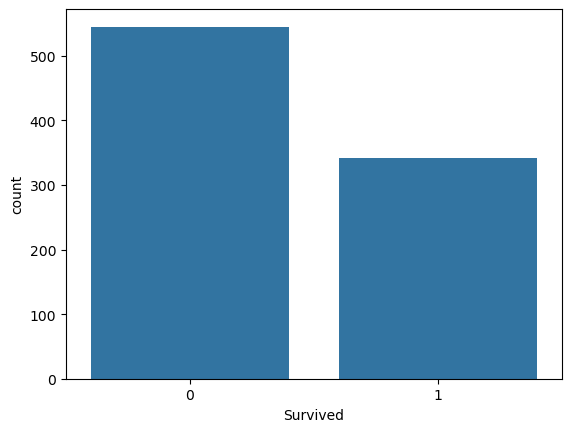

In [81]:
# Nº supervivientes
sns.countplot(data=titanic, x="Survived")
plt.show()

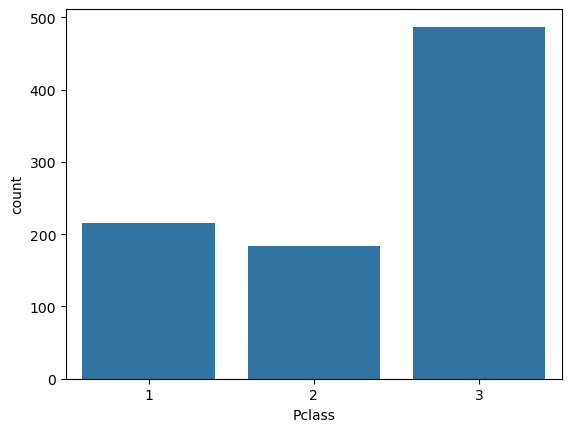

In [82]:
# Nº pasajeros por clase
sns.countplot(data=titanic, x="Pclass")
plt.show()

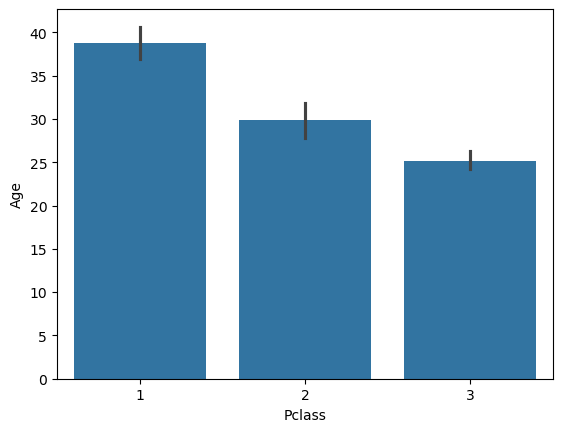

In [83]:
#Edad media frente a clase
sns.barplot(data=titanic, x="Pclass", y="Age")
plt.show()

/tmp/ipykernel_18322/2337877410.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x="Sex", y="Survived", ci=None) #media de "survived" por "Sex"


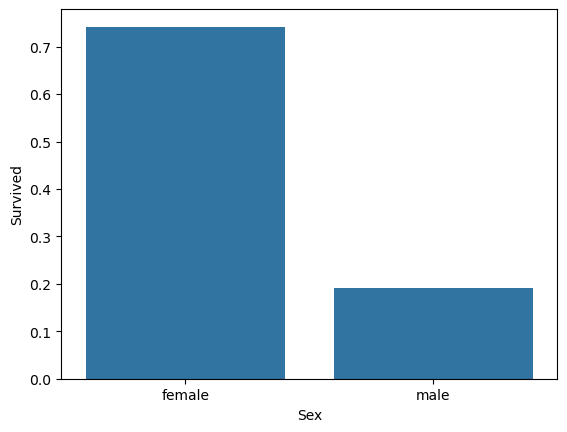

In [84]:
#visualizamos Survived frente a Sex
#seaborn toma la media de Y para representar cada categoría en X
sns.barplot(data=titanic, x="Sex", y="Survived", ci=None) #media de "survived" por "Sex"
plt.show()

/tmp/ipykernel_18322/1691009850.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x="Pclass", y="Survived", ci=None)


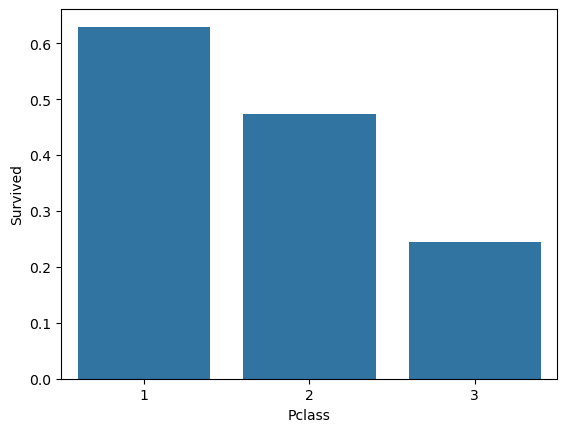

In [85]:
#supervivientes por clase
sns.barplot(data=titanic, x="Pclass", y="Survived", ci=None)
plt.show()

/tmp/ipykernel_18322/1723061926.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x="Pclass", y="Survived", hue="Sex", ci=None)


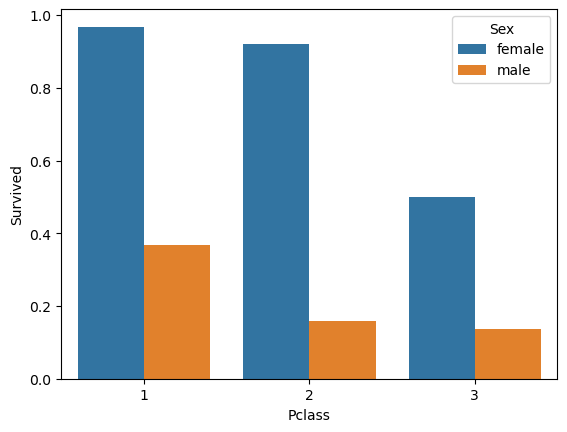

In [86]:
#supervivientes por clase y sexo
sns.barplot(data=titanic, x="Pclass", y="Survived", hue="Sex", ci=None)
plt.show()

/tmp/ipykernel_18322/1598708015.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x="Pclass", y="Age", hue="Survived", ci=None)


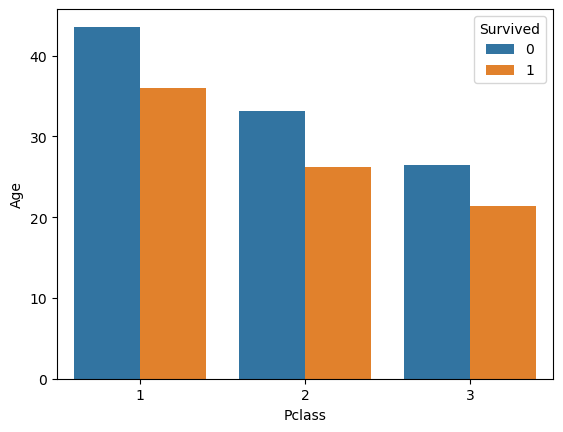

In [87]:
#edad media según supervivencia por clase
sns.barplot(data=titanic, x="Pclass", y="Age", hue="Survived", ci=None)
plt.show()

### Tablas de contingencia
Contamos agrupando por variables

In [88]:
#Tabla de contingencia: nº de pasajeros por supervivencia y sexo
pd.crosstab(index=titanic['Survived'], columns=titanic['Sex'])

Sex,female,male
Survived,,
0,81,464
1,233,109


In [89]:
#Tabla de contingencia: nº de pasajeros por sexo y supervivencia
pd.crosstab(index=titanic['Sex'], columns=titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,464,109


In [90]:
#Tabla de contingencia: nº de pasajeros por clase y sexo
pd.crosstab(index=titanic['Pclass'], columns=titanic['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,343


In [91]:
#Tabla de contingencia: nº de pasajeros por supervivencia y clase
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,368
1,136,87,119


In [92]:
#Tabla de contingencia: nº de supervivientes por sexo y clase (multi-columna)
titanic_surv = pd.crosstab(index=titanic['Survived'], columns=[titanic['Sex'],titanic['Pclass']])
titanic_surv

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  296
1            91  70  72   45  17   47

In [93]:
titanic_surv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (female, 1)  2 non-null      int64
 1   (female, 2)  2 non-null      int64
 2   (female, 3)  2 non-null      int64
 3   (male, 1)    2 non-null      int64
 4   (male, 2)    2 non-null      int64
 5   (male, 3)    2 non-null      int64
dtypes: int64(6)
memory usage: 112.0 bytes


cada columna es una tupla de dos elementos:

In [94]:
titanic_surv.columns

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['Sex', 'Pclass'])

In [95]:
titanic_surv.loc[0] #indexado de filas

Sex     Pclass
female  1           3
        2           6
        3          72
male    1          77
        2          91
        3         296
Name: 0, dtype: int64

In [96]:
titanic_surv.loc[:,"male"] #indexado de columna superior

Pclass,1,2,3
Survived,,,
0,77,91,296
1,45,17,47


In [97]:
titanic_surv.loc[:,("male",2)] #indexado multicolumna

Survived
0    91
1    17
Name: (male, 2), dtype: int64

In [98]:
titanic_surv.xs(1, axis='columns', level="Pclass") #indexado columna inferior

Sex,female,male
Survived,,
0,3,77
1,91,45


### Probabilidad conjunta
Normalizamos a probabilidades la tabla de contingencias

In [99]:
N = len(titanic)
N

887

In [100]:
titanic_frec = titanic_surv / N
round(titanic_frec, 4)

Sex       female                    male                
Pclass         1       2       3       1       2       3
Survived                                                
0         0.0034  0.0068  0.0812  0.0868  0.1026  0.3337
1         0.1026  0.0789  0.0812  0.0507  0.0192  0.0530

Por ejemplo, probabilidad de supervivencia para mujeres de clase 2: $P(Survived, female, 2)$

In [101]:
titanic_frec.loc[1, ("female", 2)]

0.07891770011273957

In [102]:
titanic_frec.loc[1][("female", 2)] #equivalente

0.07891770011273957

In [103]:
titanic_frec[("female", 2)][1] #última manera

0.07891770011273957

In [104]:
#Tabla de contingencia multi-índice (supervivencia y sexo por clase)
titanic_frec_2 = pd.crosstab(index=[titanic['Survived'],titanic['Sex']], columns=[titanic['Pclass']]) / N
round(titanic_frec_2, 4)

Pclass                1       2       3
Survived Sex                           
0        female  0.0034  0.0068  0.0812
         male    0.0868  0.1026  0.3337
1        female  0.1026  0.0789  0.0812
         male    0.0507  0.0192  0.0530

In [105]:
titanic_frec_2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, (0, 'female') to (1, 'male')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       4 non-null      float64
 1   2       4 non-null      float64
 2   3       4 non-null      float64
dtypes: float64(3)
memory usage: 355.0 bytes


Cada índice es una tupla de 2 elementos:

In [106]:
titanic_frec_2.index

MultiIndex([(0, 'female'),
            (0,   'male'),
            (1, 'female'),
            (1,   'male')],
           names=['Survived', 'Sex'])

De esta tabla obtenemos las probabilidades conjuntas de los tres eventos (supervivencia, género, clase)

In [107]:
titanic_frec

Sex         female                          male                    
Pclass           1         2         3         1         2         3
Survived                                                            
0         0.003382  0.006764  0.081172  0.086809  0.102593  0.333709
1         0.102593  0.078918  0.081172  0.050733  0.019166  0.052988

In [108]:
titanic_frec.loc[0] #No Supervivientes (label 0) por género y clase
#cuidado, aquí '0' es una etiqueta y no un índice

Sex     Pclass
female  1         0.003382
        2         0.006764
        3         0.081172
male    1         0.086809
        2         0.102593
        3         0.333709
Name: 0, dtype: float64

In [109]:
#P(no supervivencia, mujer, clase 2)
#cuidado, aquí '0' es una etiqueta y no un índice
titanic_frec.loc[0, ('female', 2)]

0.006764374295377677

In [110]:
#P(no supervivencia, mujer, todas las clases)
titanic_frec.loc[0, ('female')]

Pclass
1    0.003382
2    0.006764
3    0.081172
Name: 0, dtype: float64

In [111]:
#o también
titanic_frec.loc[0, 'female']

Pclass
1    0.003382
2    0.006764
3    0.081172
Name: 0, dtype: float64

In [112]:
#o incluso
titanic_frec.loc[0]['female']

Pclass
1    0.003382
2    0.006764
3    0.081172
Name: 0, dtype: float64

In [113]:
#última manera
titanic_frec['female'].loc[0]

Pclass
1    0.003382
2    0.006764
3    0.081172
Name: 0, dtype: float64

Para calcular las probabilidad de supervivencia de la clase 1, $P(clase=1)$, hay que aplicar la regla de la suma sobre todas las columnas `PClass=1` por lo que hay que seleccionar el segundo nivel del multindex por columna con el método `xs` (*cross-section*):  

In [114]:
titanic_frec

Sex         female                          male                    
Pclass           1         2         3         1         2         3
Survived                                                            
0         0.003382  0.006764  0.081172  0.086809  0.102593  0.333709
1         0.102593  0.078918  0.081172  0.050733  0.019166  0.052988

In [115]:
titanic_frec.xs(1, axis='columns', level='Pclass') #Supervivencia por género para clase 1

Sex,female,male
Survived,,
0,0.003382,0.086809
1,0.102593,0.050733


In [116]:
titanic_frec.xs(1, axis='columns', level='Pclass')['female'] #Supervivencia para mujeres de clase 1

Survived
0    0.003382
1    0.102593
Name: female, dtype: float64

In [117]:
titanic_frec.loc[:,('female',1)] #equivale a lo anterior: indexamos una columna multi-índice

Survived
0    0.003382
1    0.102593
Name: (female, 1), dtype: float64

In [118]:
#pasajeros con Sex='female'
titanic_frec.xs('female', axis='columns', level='Sex')

Pclass,1,2,3
Survived,,,
0,0.003382,0.006764,0.081172
1,0.102593,0.078918,0.081172


In [119]:
#en este caso, al ser el primer nivel también sirve
titanic_frec.loc[:,'female']

Pclass,1,2,3
Survived,,,
0,0.003382,0.006764,0.081172
1,0.102593,0.078918,0.081172


In [120]:
#o incluso más simple
titanic_frec['female']

Pclass,1,2,3
Survived,,,
0,0.003382,0.006764,0.081172
1,0.102593,0.078918,0.081172


Repasamos ahora el indexado multi-índice

In [121]:
titanic_frec_2

Pclass                  1         2         3
Survived Sex                                 
0        female  0.003382  0.006764  0.081172
         male    0.086809  0.102593  0.333709
1        female  0.102593  0.078918  0.081172
         male    0.050733  0.019166  0.052988

In [122]:
#indexamos por el primer nivel del índice: seleccionamos filas para Survived=1
titanic_frec_2.loc[1]

Pclass,1,2,3
Sex,,,
female,0.102593,0.078918,0.081172
male,0.050733,0.019166,0.052988


In [123]:
#indexamos por el segundo nivel del índice: seleccionamos filas para Sex='males'
titanic_frec_2.xs('male', axis='index', level='Sex')

Pclass,1,2,3
Survived,,,
0,0.086809,0.102593,0.333709
1,0.050733,0.019166,0.052988


In [124]:
titanic_frec[[('female', 1), ('male', 3)]] #seleccionamos columnas concretas multi-índice

Sex,female,male
Pclass,1,3
Survived,,
0,0.003382,0.333709
1,0.102593,0.052988


In [125]:
titanic_frec.loc[1][('female', 1)] #supervivientes clase 1, female

0.10259301014656144

In [126]:
titanic_frec.loc[1, ('female', 1)]

0.10259301014656144

### Ejercicio  
Calcula las probabilidades condicionales siguientes:  
 * $P(Survived=True|Género=male)$ 
 * $P(Survived=True|Clase=1)$  
 * $P(Survived=True|Género=male, Clase=1)$  
 

Solución de $P(Survived=True|Género=male)$  

In [127]:
#recuerda
titanic_frec

Sex         female                          male                    
Pclass           1         2         3         1         2         3
Survived                                                            
0         0.003382  0.006764  0.081172  0.086809  0.102593  0.333709
1         0.102593  0.078918  0.081172  0.050733  0.019166  0.052988

In [128]:
#Solución
titanic_frec.loc[1, 'male'].sum() / titanic_frec['male'].sum().sum()

0.19022687609075042

Solución de $P(Survived=True|Clase=1)$  

In [129]:
#Solución
titanic_frec.xs(1, axis='columns', level='Pclass').loc[1].sum() / titanic_frec.xs(1, axis='columns', level='Pclass').sum().sum()

0.6296296296296295

Solución de $P(Survived=True|Género=male, Clase=1)$   
Aquí hay que aplicar la regla de la cadena:  
$P(Survived=True|Género=male, Clase=1) = P(Survived=True, Género=male, Clase=1) / P(Género=male, Clase=1)$

In [130]:
#Solución
titanic_frec['male', 1][1] / titanic_frec['male', 1].sum()

0.3688524590163934

### Independencia de las variables
¿son independientes género y clase?  
Si lo son debe cumplirse la igualdad $P(G,C)=P(G)*P(C)$  
Lo comprobamos para género='male' y clase=1

In [131]:
#P(G,C)
P_h_c1 = sum(titanic_frec[('male',1)]) #P(male, class1)
P_h_c1

0.13754227733934613

In [132]:
#P(G)
P_h = titanic_frec['male'].sum().sum() #P(male)
P_h

0.6459977452085682

In [133]:
#P(C)
P_c1 = titanic_frec.xs(1, axis=1, level='Pclass').sum().sum() #P(class1)
P_c1

0.2435174746335964

In [134]:
#P(G)*P(C)
P_h * P_c1

0.157311739532188

**No** son independientes.  
Otra manera de comprobarlo es mirar si $P(G|C) = P(G)$

In [135]:
#P(hombre|c1) = P(hombre, clase1) / P(clase1)
P_h_c_1 = P_h_c1 / P_c1

In [136]:
P_h_c_1

0.5648148148148149

In [137]:
P_h

0.6459977452085682

Podemos comprobar para ambos sexos a la vez

In [138]:
p_sex_c = pd.crosstab(index=titanic['Sex'], columns=titanic['Pclass']) / N
p_sex_c

Pclass,1,2,3
Sex,,,
female,0.105975,0.085682,0.162345
male,0.137542,0.121759,0.386697


In [139]:
#P(G|C) = P(G,C) / P(C)
p_sex_c / p_sex_c.sum()

Pclass,1,2,3
Sex,,,
female,0.435185,0.413043,0.295688
male,0.564815,0.586957,0.704312


In [140]:
#mientras que P(G) es
p_sex_c.sum(axis=1)

Sex
female    0.354002
male      0.645998
dtype: float64

El hecho de ser hombre y viajar en clase 1 no son independientes (la prob. de ser hombre es menor entre los pasajeros de la clase 1). Generalizando, la prob. de pertenecer a un sexo depende de la clase en la que se viajaba

In [141]:
# ¿es independiente la probabilidad de supervencia de la clase?
#P(S|c1)=P(S) ??
P_S_c1 = (titanic_frec.xs(1, axis=1, level='Pclass').loc[1].sum() /
          titanic_frec.xs(1, axis=1, level='Pclass').sum().sum())#P(S|c1) = P(S,c1)/P(c1)

P_S_c1

0.6296296296296295

¿es independiente probabilidad de supervivencia y clase?  
La probabilidad de supervivencia condicionada a cada clase es:

In [142]:
#para todas las clases
# P(S|C) = P(S,C) / P(C)
titanic_frec_surv_class = pd.crosstab(index=titanic["Survived"], columns=titanic["Pclass"])/N
titanic_frec_surv_class.loc[1] / titanic_frec_surv_class.sum()

Pclass
1    0.629630
2    0.472826
3    0.244353
dtype: float64

Pero la probabilidad global de supervivencia, $P(S=1)$ es:  

In [143]:
P_S = titanic_frec.loc[1].sum() #P(S)

P_S

0.3855693348365276

No es independiente la probabilidad de supervivencia y la clase.  
Por otro lado, ¿es independiente probabilidad de supervivencia y género?  

In [144]:
#P(S|G) = P(S,G) / P(G)
titanic_frec_surv_sex = pd.crosstab(index=titanic["Survived"], columns=titanic["Sex"])/N
titanic_frec_surv_sex.loc[1] / titanic_frec_surv_sex.sum()

Sex
female    0.742038
male      0.190227
dtype: float64

No es independiente porque la probabilidad de supervivencia cambia cuando se condiciona al género.

## Teorema de Bayes
### Ejercicio práctico: sistema de diagnóstico de Meningitis  
* La meningitis (M) causa el síntoma de rigidez de cuello (S) en un 50% de los casos: $P(S|M)=0.5$    
* se conoce también la probabilidad a priori de que un paciente tenga meningitis: $P(M)=1/50000$    
* se conoce la probabilidad a priori de que un paciente tenga rigidez de cuello $P(S)=1/20$    

Por tanto podemos calcular $P(M|S)$ (probabilidad de que un paciente con rigidez de cuello sufra una meningitis)

In [145]:
pS_M = 0.5
pM = 1/50000
pS = 1/20

#teorema de Bayes: P(M|S) = P(S|M)*P(M)/P(S)
pM_S = (pS_M*pM) / pS
pM_S

0.0002

In [146]:
#probabilidad a priori de tener meningitis
pM

2e-05

In [147]:
#probabilidad a posteriori de tener meningitis, dado que se tiene rigidez de cuello
pM_S

0.0002

La probabilidad de tener meningitis si se tiene rigidez de cuello aumenta en un factor:


In [148]:
pM_S / pM

10.0

Ahora evaluamos cómo varía $P(M|S)$ cuando varía $P(S)$ (probabilidad a priori de tener rigidez de cuello)

In [149]:
pSarray = np.arange(start=1/20, stop=1, step=1/20)
pM_Sarray = [pS_M*pM/pS for pS in pSarray]

pSarray
pM_Sarray

[0.0002,
 0.0001,
 6.666666666666666e-05,
 5e-05,
 4e-05,
 3.3333333333333335e-05,
 2.857142857142857e-05,
 2.5e-05,
 2.2222222222222223e-05,
 2e-05,
 1.8181818181818182e-05,
 1.6666666666666664e-05,
 1.5384615384615384e-05,
 1.4285714285714285e-05,
 1.3333333333333333e-05,
 1.25e-05,
 1.176470588235294e-05,
 1.111111111111111e-05,
 1.0526315789473684e-05]

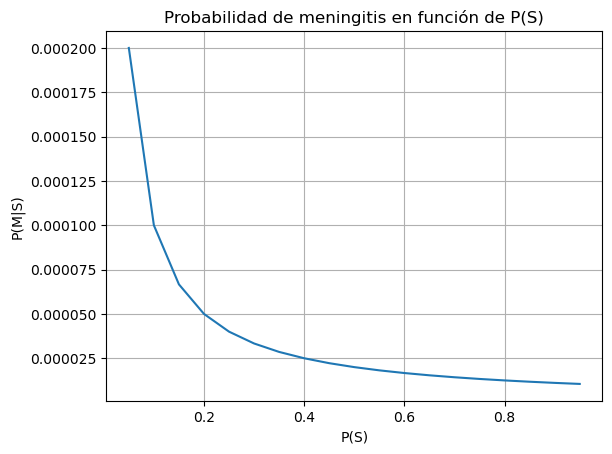

In [150]:
plt.plot(pSarray, pM_Sarray)
plt.xlabel('P(S)')
plt.ylabel('P(M|S)')
plt.grid()
plt.title("Probabilidad de meningitis en función de P(S)")
plt.show()

Cuando más probable es el síntoma de la rigidez de cuello, menos informativo es para nuestros propósitos (menos probable de que se deba a una meningitis)

### Ejercicio práctico: PCR para detectar COVID-19  
* Un test PCR tiene una sensibilidad del 93% y una especificidad del 99%    
* La prevalencia estimada de COVID-19 es del 10% de la población en general

Si una PCR tiene un resultado positivo, ¿cuál es la probabilidad *real* de tener COVID-19? ¿y si el paciente se hace una segunda PCR y también es positiva?  
¿qué pasaría si baja la prevalencia del COVID-19 al 1%? ¿y si la especificidad del test es del 95%?  
**Ayuda:**  
*sensibilidad = P(PCR|C)* [Prob. de test positivo cuando se tiene COVID],  
*especificidad = P(noPCR|noC)* [Prob. de test negativo cuando no se tiene COVID]

In [151]:
# Solución
# P(COV | T+) = P(T+ | COV) * P(COV) / P(T+)

Pcr_Cov = 0.93
PcrN_Cov = 0.07
Pcr_CovN = 0.01
PcrN_CovN = 0.99

P_CovN = 0.9
P_Cov = 0.1
P_Pcr = Pcr_Cov * P_Cov + Pcr_CovN * P_CovN

P_Cov_Pcr = Pcr_Cov * P_Cov / P_Pcr

P_Cov_Pcr

0.911764705882353

In [152]:
#para la segunda PCR:

# Misma fórmula pero la probabilidad de covid cambia a P_Cov_Pcr

P_2Pcr = Pcr_Cov * P_Cov_Pcr + Pcr_CovN * (1-P_Cov_Pcr)
P_Cov_2Pcr = Pcr_Cov * P_Cov_Pcr / P_2Pcr

P_Cov_2Pcr


0.998960498960499

In [153]:
#si baja la prevalencia de la COVID-19 al 1%

P_Cov = 0.01
P_CovN = 1-P_Cov
P_Pcr = Pcr_Cov * P_Cov + Pcr_CovN * P_CovN

P_Cov_Pcr = Pcr_Cov * P_Cov / P_Pcr

P_Cov_Pcr


0.484375

In [154]:
#si baja la especificidad del test al 95%

Pcr_Cov = 0.93
PcrN_Cov = 0.07
Pcr_CovN = 0.05
PcrN_CovN = 0.95

P_CovN = 0.9
P_Cov = 0.1

P_Pcr = Pcr_Cov * P_Cov + Pcr_CovN * P_CovN


P_Cov_Pcr = Pcr_Cov * P_Cov / P_Pcr

P_Cov_Pcr

0.6739130434782609

## Variables aleatorias
Una variable aleatoria es una variable que toma valores numéricos de un fenómeno aleatorio (con una determinada distribución de probabilidad). Las variables aleatorias pueden ser `discretas` o `continuas`.  
### Variables discretas
Suponemos que tenemos una población con los números enteros del 1 al 6 (por ejemplo al lanzar un dado de 6 caras).  

In [155]:
np.random.seed(12345)
x=np.arange(6)+1

x

array([1, 2, 3, 4, 5, 6])

Selección de muestras al azar (de manera aleatoria uniforme)

In [156]:
#Permutación de la población
np.random.shuffle(x) #Ojo, no devuelve un array sino que modifica el original
x

array([6, 4, 5, 1, 2, 3])

In [157]:
#otra manera
np.random.permutation(x) #devuelve un array con las permutaciones

array([2, 6, 1, 4, 5, 3])

In [158]:
x #no modifica el array original

array([6, 4, 5, 1, 2, 3])

In [159]:
#última manera
np.random.permutation(6)+1 #genera un array de [0...5] y lo permuta

array([1, 5, 6, 3, 4, 2])

In [160]:
#muestreo de la población sin reemplazo
np.random.choice(x, 3, replace=False)

array([2, 3, 1])

In [161]:
#muestreo con reemplazo
np.random.choice(x, 10, replace=True)

array([4, 5, 1, 3, 6, 3, 4, 1, 2, 6])

In [162]:
#repetición del experimento 10 veces
a=np.array([np.random.choice(x, 3, replace=False) for i in range(10)])
a

array([[3, 5, 4],
       [5, 6, 2],
       [5, 2, 4],
       [4, 5, 6],
       [4, 2, 5],
       [2, 3, 5],
       [1, 3, 4],
       [1, 6, 2],
       [2, 5, 6],
       [6, 3, 1]])

In [163]:
#¿qué dimensiones tiene este array?
a.shape

(10, 3)

## Distribuciones de probabilidad

La distribución de probabilidad (PMF de sus siglas en inglés) de una variable discreta es una lista de las probabilidades asociadas a cada valor posible.  
La función de distribución acumulativa (CDF) es indica la probabilidad de que una variable aleatoria X sea menor o igual que x.  
En Python, podemos generar muestras aleatorias para distintas funciones de distribución con el paquete `numpy.random.Generator` (https://numpy.org/doc/stable/reference/random/generator.html).  
Podemos calcular la PMF y la CDF de distintas distribuciones con el paquete `scipy.stats` (https://docs.scipy.org/doc/scipy/reference/stats.html)  

## Distribuciones discretas
### Distribución uniforme
Generamos una secuencia uniforme de números enteros entre 0 y 9

In [164]:
size = 1000
n = 10
s = np.random.choice(np.arange(n), size, replace=True)
s.shape

(1000,)

In [165]:
s[:10]

array([3, 0, 3, 0, 6, 2, 1, 5, 8, 6])

In [166]:
#frecuencia de cada número
counts = np.unique(s, return_counts=True)
counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([123,  86, 112, 101,  79, 110,  98,  87, 100, 104]))

#### Distribución de probabilidad

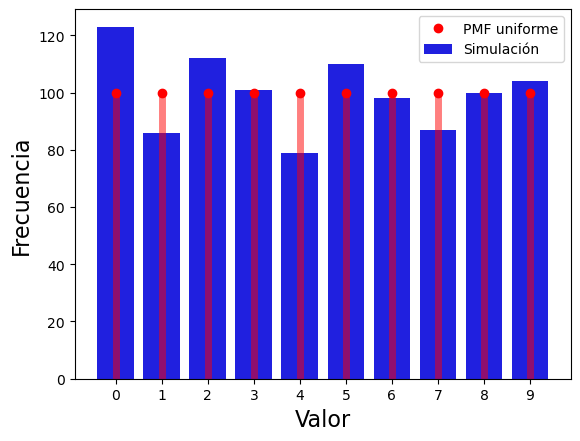

In [167]:
fig, ax = plt.subplots()
ax = sns.countplot(x=s, label='Simulación', color='b')
ax.set_xlabel("Valor",fontsize=16)
ax.set_ylabel("Frecuencia",fontsize=16)
x = range(n)
ax.plot(x, np.ones(n)*size/n, 'ro', label='PMF uniforme')
ax.vlines(x, 0, np.ones(n)*size/n, 'r', lw=5, alpha=0.5)
plt.legend()
plt.show()

#### Función de probabilidad acumulada

In [168]:
#frecuencia acumulada
counts[1].cumsum()

array([ 123,  209,  321,  422,  501,  611,  709,  796,  896, 1000])

In [169]:
cdf = counts[1].cumsum() / size
cdf

array([0.123, 0.209, 0.321, 0.422, 0.501, 0.611, 0.709, 0.796, 0.896,
       1.   ])

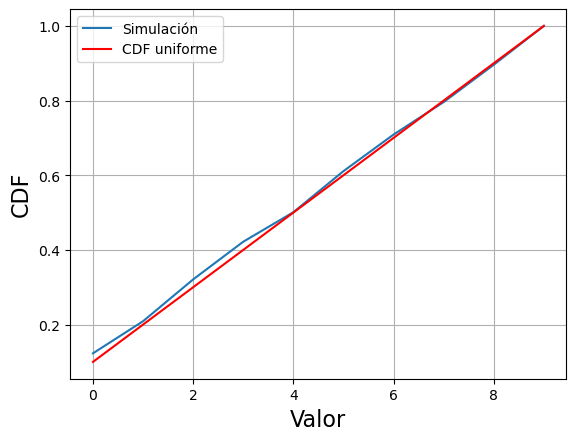

In [170]:
plt.subplots()
plt.plot(counts[0], counts[1].cumsum()/size, label='Simulación')
plt.xlabel("Valor",fontsize=16)
plt.ylabel("CDF",fontsize=16)
plt.plot(x, (np.ones(n)*size/n).cumsum()/size, 'r', label='CDF uniforme')
plt.legend()
plt.grid()
plt.show()

### Distribución binomial
P. ej. si la probabilidad de que suceda un evento (acierto) es p=0.3 y repetimos el evento 10 veces, ¿cuál es la probabilidad de que suceda el evento $x$ veces ( $PDF(x, n=10, p=0,3)$ )?  
Lo simulamos con `np.random.default_rng().binomial`.  
Podemos calcular el valor teórico del la PMF con el método `pmf` de la clase `scipy.stats.binom`.

In [171]:
from scipy.stats import binom
size = 1000 #nº de veces que repetimos la simulación
n = 10
p = 0.3
s = np.random.default_rng().binomial(n, p, size)

In [172]:
s.shape

(1000,)

In [173]:
s[:10]

array([3, 2, 3, 3, 5, 5, 4, 4, 6, 4])

In [174]:
np.unique(s, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 24, 115, 252, 254, 203, 108,  34,   9,   1]))

P. ej. valor teórico de la PMF de una distribución binomial (n=10, p=0.3) para el evento 0 (probabilidad de que ocurran 0 eventos para 10 ejecuciones):

In [175]:
binom.pmf(0, n, p)

0.0282475249

Para 1000 realizaciones del experimento

In [176]:
binom.pmf(0, n, p) * size

28.247524900000002

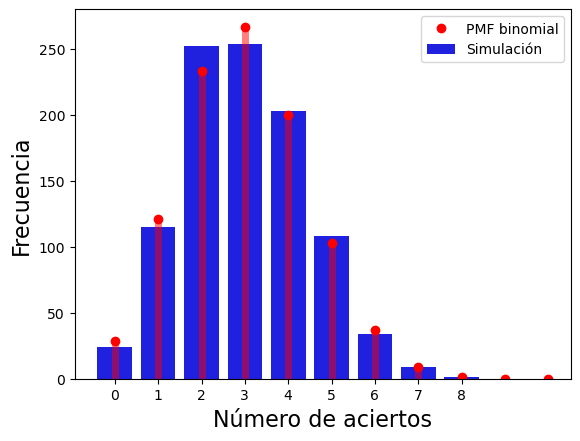

In [177]:
fig, ax = plt.subplots()
ax = sns.countplot(x=s, label='Simulación', color='b')
ax.set_xlabel("Número de aciertos",fontsize=16)
ax.set_ylabel("Frecuencia",fontsize=16)
x = range(n+1)
ax.plot(x, binom.pmf(x, n, p)*size, 'ro', label='PMF binomial')
ax.vlines(x, 0, binom.pmf(x, n, p)*size, colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

In [178]:
#frecuencia teórica de acertar 7 veces en 1000 simulaciones
binom.pmf(7,10,0.3)*1000

9.001691999999991

In [179]:
#CDF
#normalizamos frecuencias a probabilidad
prob=pd.Series(s).value_counts().sort_index()/size
prob

0    0.024
1    0.115
2    0.252
3    0.254
4    0.203
5    0.108
6    0.034
7    0.009
8    0.001
Name: count, dtype: float64

In [180]:
#otra manera
counts = np.unique(s, return_counts=True)
counts[1]/size

array([0.024, 0.115, 0.252, 0.254, 0.203, 0.108, 0.034, 0.009, 0.001])

In [181]:
#prob. acumulada
prob.cumsum()

0    0.024
1    0.139
2    0.391
3    0.645
4    0.848
5    0.956
6    0.990
7    0.999
8    1.000
Name: count, dtype: float64

In [182]:
#CDF teórica de acertar 7 veces o menos en 10 repeticiones
binom.cdf(7, n, p)

0.9984096136

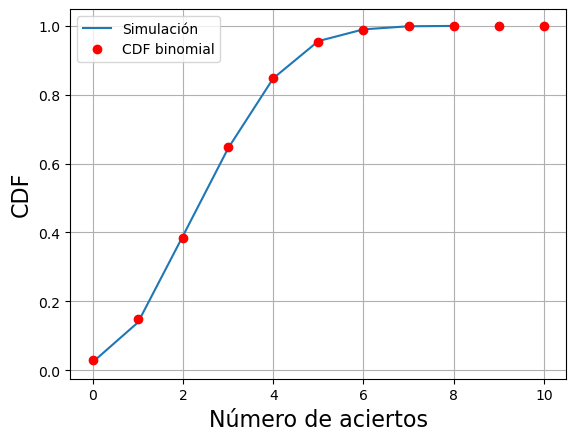

In [183]:
fig, ax = plt.subplots()
ax = prob.cumsum().plot(label='Simulación')
ax.set_xlabel("Número de aciertos",fontsize=16)
ax.set_ylabel("CDF",fontsize=16)
x = range(n+1)
ax.plot(x, binom.cdf(x, n, p), 'ro', label='CDF binomial')
plt.legend()
plt.grid()
plt.show()

In [184]:
#Probabilidad de tener entre 4 y 7 aciertos
binom.cdf(7, n, p)-binom.cdf(3, n, p)

0.34879889519999985

In [185]:
#Probabilidad acertar 3 o menos veces
binom.cdf(3, n, p)

0.6496107184000002

In [186]:
#al lanzar una moneda 100 veces, ¿cuál es la probabilidad de que salga exactamente 20 caras?
binom.pmf(20, 100, 0.5)

4.2281632676015645e-10

In [187]:
#al lanzar una moneda 100 veces, ¿cuál es la probabilidad de que salga 20 caras o menos?
binom.cdf(20, 100, 0.5)

5.579544528625976e-10

In [188]:
#al lanzar una moneda 100 veces, ¿cuál es la probabilidad de que salga 50 caras o menos?
binom.cdf(50, 100, 0.5)

0.5397946186935895

In [189]:
#al lanzar una moneda 100 veces, ¿cuál es la probabilidad de que salgan más de 50 caras?
1-binom.cdf(50,100,0.5)

0.46020538130641053

#### Valor esperado
El valor esperado de una variable aleatoria es el valor medio que toma la variable para un gran número de ejecuciones. Se define como:  
\begin{align}
E[X]=\sum{xp(x)} 
\end{align}
Calculamos el valor esperado en una variable con distribución binomial:

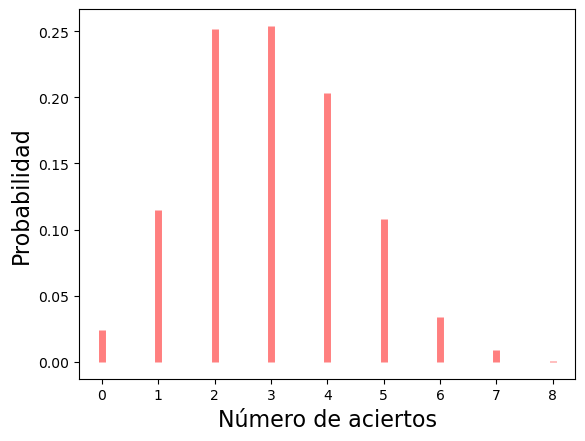

In [190]:
fig, ax = plt.subplots()
ax.vlines(prob.index, 0, prob, colors='r', lw=5, alpha=0.5)
ax.set_xlabel("Número de aciertos",fontsize=16)
ax.set_ylabel("Probabilidad",fontsize=16)
plt.show()

In [191]:
prob

0    0.024
1    0.115
2    0.252
3    0.254
4    0.203
5    0.108
6    0.034
7    0.009
8    0.001
Name: count, dtype: float64

In [192]:
#valor de la simulación
E=sum(prob.index*prob)
E

3.0080000000000005

In [193]:
#valor teórico
x=range(10+1)
E=sum(x*binom.pmf(x, n, p))
E

2.999999999999998

#### Ejemplo
Si realizamos un cuestionario con n=10 preguntas con 4 opciones cada respuesta, y la persona que realiza la prueba responde al azar, ¿Cuál es la nota esperada? ¿cuál es la probabilidad de aprobar? ¿Y si penalizamos con 0.25 puntos la respuesta equivocada?

In [194]:
#Solución: sin penalización
n = 10
p = 1/4
#la probabilidad de acertar x preguntas sigue una distribución binomial
x = range(n+1)
p_x = binom.pmf(x, n, p)

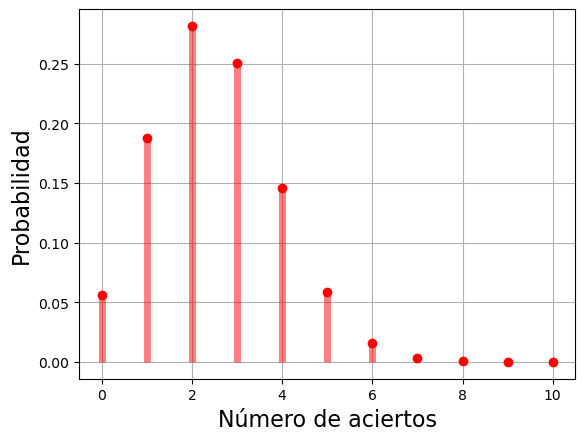

In [195]:
plt.plot(x, p_x, 'ro', )
plt.vlines(x, 0, p_x, colors='r', lw=5, alpha=0.5)
plt.xlabel("Número de aciertos",fontsize=16)
plt.ylabel("Probabilidad",fontsize=16)
plt.grid()
plt.show()

In [196]:
#la nota esperada es la suma de cada x por su probabilidad
nota_esperada = np.sum(x*p_x)
nota_esperada

2.499999999999999

In [197]:
#Simular 1000 exámenes y obtener la nota media de todos los exámenes

size = 1000
n = 10
p = 1/4
s = np.random.default_rng().binomial(n, p, size)

In [198]:
s.mean()

2.508

In [199]:
#¿cuál es la probabilidad de sacar al menos un 3?
1-binom.cdf(2, n, p) #Hay que acertar más de 2 preguntas

0.4744071960449219

In [200]:
#¿cuál es la prob de aprobar?
1-binom.cdf(4, n, p) 

0.07812690734863281

Aplicando penalización

In [201]:
#si acierta x preguntas, falla n-x preguntas con una penalización de -1/4
nota_esperada = np.sum(x*p_x) - np.sum((np.ones(n+1)*n-x)*p_x*1/4)
nota_esperada

0.6249999999999996

In [202]:
#donde el número de preguntas falladas es 10-(nº aciertos)
(np.ones(n+1)*n-x)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

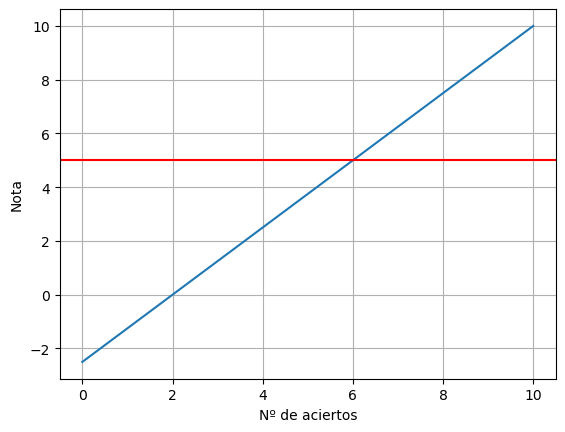

In [203]:
#Representamos Nota final con penalización según nº de aciertos
plt.plot(x-(np.ones(n+1)*n-x)*1/4)
plt.axhline(y=5, color='red')
plt.xlabel('Nº de aciertos')
plt.ylabel('Nota')
plt.grid()
plt.show()

Hace falta acertar al menos 6 preguntas para aprobar:

In [204]:
#nota obtenida para cada nº de aciertos
pd.Series(x-(np.ones(n+1)*n-x)*1/4)

0     -2.50
1     -1.25
2      0.00
3      1.25
4      2.50
5      3.75
6      5.00
7      6.25
8      7.50
9      8.75
10    10.00
dtype: float64

Con penalización, ¿cuál es la prob. de sacar más de 3?

In [205]:
#hace falta al menos acertar 5 preguntas (nota: 3,75)
1-binom.cdf(4, n, p)

0.07812690734863281

Probabilidad de aprobar con penalización. Hay que acertar al menos 6 preguntas

In [206]:
1-binom.cdf(5, n, p) #prob. acumulada de acercar 6 o más preguntas

0.019727706909179688

### Distribución multinomial
Es una generalización de la distribución binomial, en la que cada experimento puede tomar un valor de entre  $p$  valores posibles.  
Ejemplo: si lanzamos un dado (equilibrado) 20 veces, ¿cuántas veces sale cada valor?

In [207]:
veces = 20
p = [1/6]*6 #probabilidad de cada cara

In [208]:
#nº de veces que sale cada cara al lanzar 20 veces el dado
s = np.random.default_rng().multinomial(veces, p, size=1)
s

array([[3, 3, 4, 7, 1, 2]])

In [209]:
np.sum(s)

20

Si repetimos el experimento muchas veces, dado que la probabilidad es igual para todo los lados, la tendencia es a tener una distribución uniforme de valores

In [210]:
s = np.random.default_rng().multinomial(veces, p, size=1000)

In [211]:
s.shape

(1000, 6)

In [212]:
np.mean(s, axis=0)

array([3.411, 3.371, 3.236, 3.431, 3.281, 3.27 ])

In [213]:
np.mean(s, axis=0).sum()

20.0

Si repetimos infinitas veces el experimiento de lanzar 20 veces el dado, cada lado debe salir 20/6 veces

In [214]:
20/6

3.3333333333333335

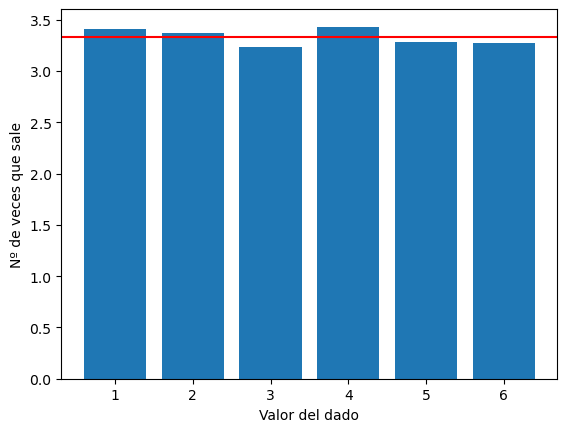

In [215]:
plt.bar(x=np.arange(6)+1, height=np.mean(s, axis=0))
plt.axhline(y=20/6, color='red')
plt.xlabel('Valor del dado')
plt.ylabel('Nº de veces que sale')
plt.show()

Suponemos un dado trucado en el que el 4 tiene el doble de probabilidad de salir que el resto de caras:

In [216]:
#Calculamos la probabilidad de cada evento (cada una de las caras)
prob = [1,1,1,2,1,1]
p=np.array(prob)/sum(prob) #normalizamos las probabilidades
p

array([0.14285714, 0.14285714, 0.14285714, 0.28571429, 0.14285714,
       0.14285714])

In [217]:
np.random.default_rng().multinomial(veces, p, size=1)

array([[3, 3, 4, 5, 5, 0]])

In [218]:
s = np.random.default_rng().multinomial(veces, p, size=1000)
s.mean(axis=0)

array([2.902, 2.786, 2.875, 5.69 , 2.955, 2.792])

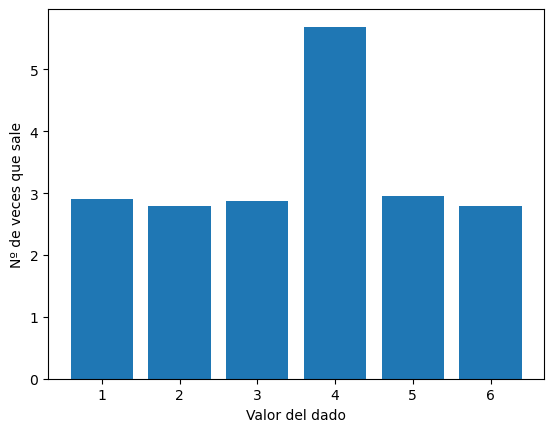

In [219]:
plt.bar(x=np.arange(6)+1, height=np.mean(s, axis=0))
plt.xlabel('Valor del dado')
plt.ylabel('Nº de veces que sale')
plt.show()

### Distribución de Poisson
Es una generalización de la distribución binomial para valores grandes de N.  
#### Ejemplo:
Nº de coches que pasan por una carretera en 1 hora para una estimación de 100 coches/hora

In [220]:
from scipy.stats import poisson

lam = 100 #coches por hora
s = np.random.default_rng().poisson(lam, size=1000) #simulamos 1000 repeticiones

In [221]:
s[:10]

array([103,  90, 102, 103,  97, 113,  90, 126,  89, 100])

In [222]:
s.shape

(1000,)

In [223]:
len(np.unique(s))

59

In [224]:
poisson.ppf(0.01, lam) #percentil 1% de coches por hora

77.0

Es decir, sólo el 1% de las veces pasan 77 coches o menos

In [225]:
poisson.ppf(0.99, lam) #percentil 99% de coches por hora

124.0

In [226]:
poisson.pmf(100, lam) #probabilidad de que pasen exactamente 100 coches/hora

0.03986099680914883

In [227]:
poisson.pmf([50, 90, 100, 110, 150], lam) #probabilidad de que pasen exactamente esos coches/hora

array([1.22314216e-08, 2.50389446e-02, 3.98609968e-02, 2.34225495e-02,
       6.51116047e-07])

In [228]:
#Probabilidad de que pasen más de 120 coches en una hora
1 - poisson.cdf(120, lam)

0.02266932907835273

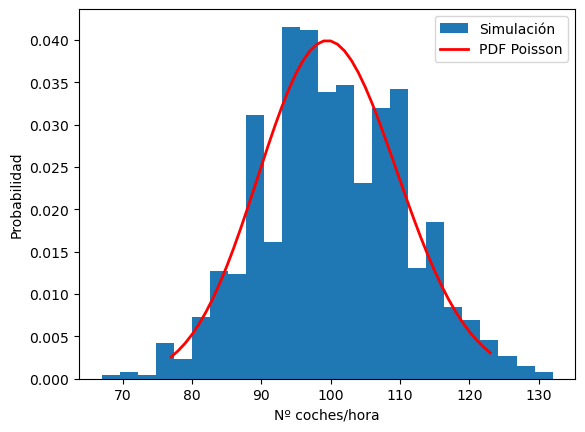

In [229]:
count, bins, ignored = plt.hist(s, 25, density=True, label='Simulación')
x = np.arange(poisson.ppf(0.01, lam),
               poisson.ppf(0.99, lam))
plt.plot(x, poisson.pmf(x, lam), linewidth=2, color='r', label='PDF Poisson')
plt.xlabel("Nº coches/hora")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

In [230]:
#suma de todas las probabilidades teóricas (ojo, se excluye el percentil 1% por cada extremo)
sum(poisson.pmf(x, lam))

0.9813108022679161

En la simulación, si contamos el nº de veces que pasan entre entre 77 y 124 coches (rango del percentil 98%):

In [231]:

sum(np.isin(s, x))/size

0.975

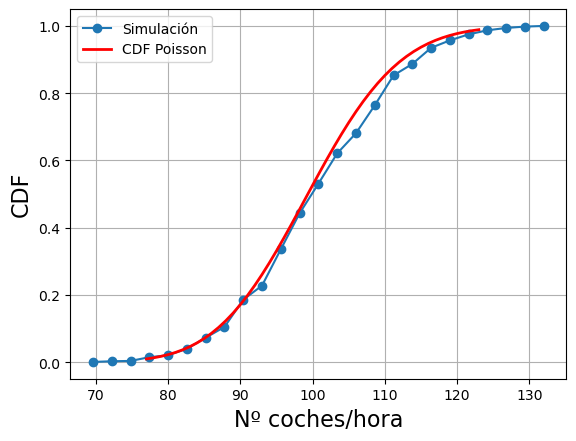

In [232]:
#CDF
fig, ax = plt.subplots()
ax.plot(bins[1:], count.cumsum()/count.sum(), 'o-', label='Simulación')
ax.set_xlabel("Nº coches/hora",fontsize=16)
ax.set_ylabel("CDF",fontsize=16)
ax.plot(x, poisson.cdf(x, lam), linewidth=2, color='r', label='CDF Poisson')
plt.legend()
plt.grid()
plt.show()

In [233]:
#¿cuál es la posibilidad de que pasen entre 90 y 110 coches en una hora?

poisson.cdf(110, lam)-poisson.cdf(89, lam)

0.7065164768589975

#### Ejemplo 2
Imaginad que enviamos un paquete de bits de longitud $n = 10^4$ donde cada bit puede estar corrupto independientemente con una probabilidad $p=10^{-6}$.  
¿cuál es la probabilidad de que se reciba un mensaje sin corromper?  
Aquí $\lambda=10^4 \times 10^{-6}=0.01$ luego:  

In [234]:
lam = 0.01
poisson.pmf(0, lam) #probabilidad de 0 eventos de error

0.9900498337491681

In [235]:
#probabilidad de algún error
1-poisson.pmf(0, lam)

0.009950166250831893

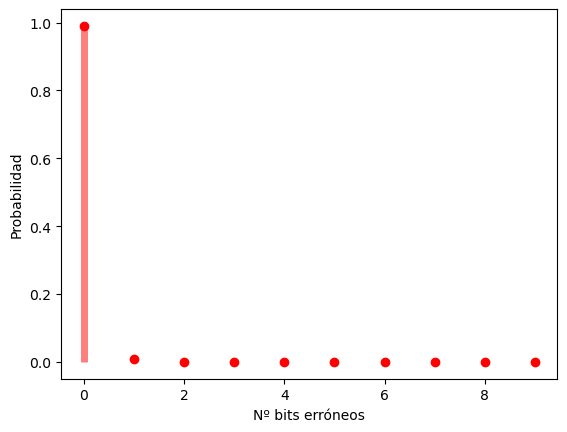

In [236]:
#Probabilidad de tener N bits erróneos
x = np.arange(10)
plt.plot(x, poisson.pmf(x, lam), 'ro')
plt.vlines(x, 0, poisson.pmf(x, lam), colors='r', lw=5, alpha=0.5)
plt.xlabel("Nº bits erróneos")
plt.ylabel("Probabilidad")
plt.show()

In [237]:
#valor numérico de probabilidad
pd.Series(np.round(poisson.pmf(x, lam), 5))

0    0.99005
1    0.00990
2    0.00005
3    0.00000
4    0.00000
5    0.00000
6    0.00000
7    0.00000
8    0.00000
9    0.00000
dtype: float64

### Ejemplo 3
Analizamos los homicidios cometidos en Inglaterra y Gales entre 2013 y 2016 (https://www.ons.gov.uk/peoplepopulationandcommunity/crimeandjustice/compendium/focusonviolentcrimeandsexualoffences/yearendingmarch2016/homicide#statistical-interpretation-of-trends-in-homicides).  
Vemos cómo el nº de homicidios por día sigue una estadística de Poisson (tomando como lambda la media de homicidios/día en ese período).

In [238]:
homicidios = pd.read_csv("homicidios.csv")
homicidios

,Homicides,Occurences
0,0,259
1,1,387
2,2,261
3,3,131
4,4,40
5,5,13
6,6,3
7,7 o más,0


Calculamos la media de homicidios/día y sacamos la distribución de Poisson para comparar

In [239]:
total = np.sum(np.arange(8)*homicidios.Occurences)
media = total / 365 / 3 #período de 3 años
print(f'Ha habido un total de {total} homicidios, con una media de {media:.3f} homicidios/día')

Ha habido un total de 1545 homicidios, con una media de 1.411 homicidios/día


In [240]:
homicidios["estimados"] = poisson.pmf(np.arange(8), media) * (365*3)
homicidios

,Homicides,Occurences,estimados
0,0,259,267.080667
1,1,387,376.839846
2,2,261,265.852768
3,3,131,125.035777
4,4,40,44.105086
5,5,13,12.446093
6,6,3,2.926821
7,7 o más,0,0.589946


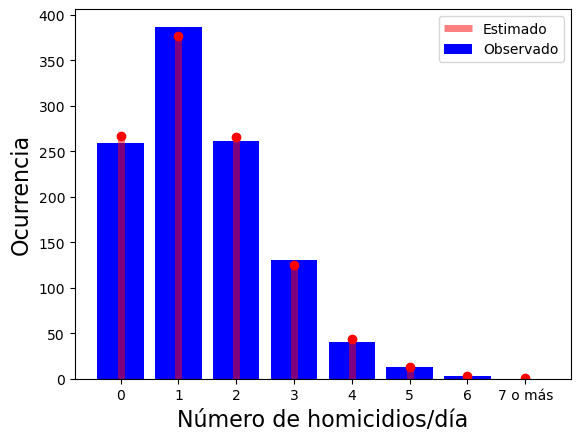

In [241]:
fig, ax = plt.subplots()
plt.bar(x=homicidios.Homicides, height=homicidios.Occurences, color='b', label="Observado")
ax.vlines(homicidios.Homicides, 0, homicidios.estimados, colors='r', lw=5, alpha=0.5, label="Estimado")
plt.plot(homicidios.Homicides, homicidios.estimados, 'ro')
ax.set_xlabel("Número de homicidios/día",fontsize=16)
ax.set_ylabel("Ocurrencia",fontsize=16)
plt.legend()

plt.show()

## Distribuciones continuas
### Distribución uniforme
Lo podemos simular con `np.random.Generator.uniform`


In [242]:
size = 1000
s = np.random.default_rng().uniform(size=size)

In [243]:
s[:10]

array([0.04060548, 0.70614857, 0.15276602, 0.78577647, 0.96876017,
       0.13813067, 0.51738086, 0.43411139, 0.05155394, 0.5381869 ])

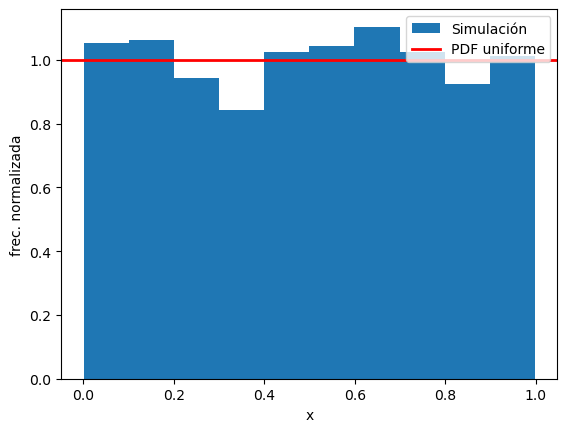

In [244]:
count, bins, ignored = plt.hist(s, 10, density=True, label='Simulación')
plt.axhline(y=1, linewidth=2, color='r', label='PDF uniforme')
plt.legend()
plt.xlabel('x')
plt.ylabel('frec. normalizada')
plt.show()

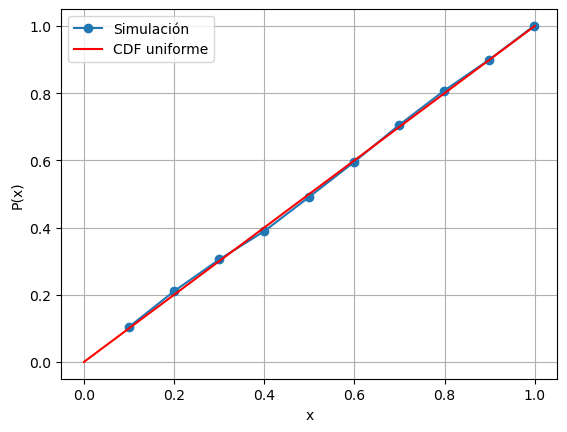

In [245]:
#CDF
plt.plot(bins[1:], count.cumsum()/np.sum(count), 'o-')
plt.plot([0,1], [0,1], 'r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend(['Simulación', 'CDF uniforme'])
plt.grid()
plt.show()

### Distribución normal
La podemos simular con `np.random.Generator.normal` y calcular con `scipy.stats.norm`.


In [246]:
mu, sigma = 0, 0.1 # media y desviación estándar
size=1000
s = np.random.default_rng().normal(mu, sigma, size)

In [247]:
s.shape

(1000,)

In [248]:
s[:10]

array([ 0.0104817 ,  0.01148711, -0.02480541, -0.04624817,  0.15522748,
       -0.11942423, -0.20875631, -0.0003249 ,  0.09884616,  0.04853069])

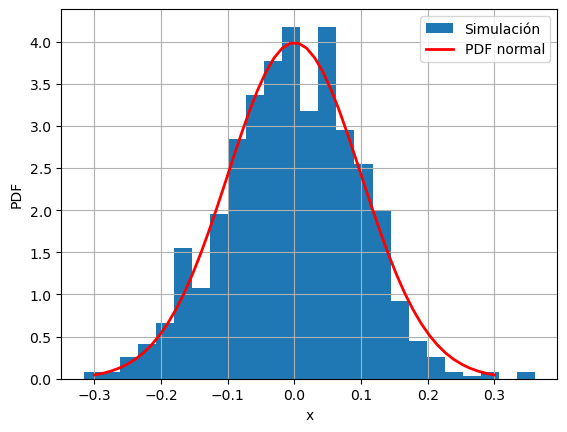

In [249]:
from scipy.stats import norm
count, bins, ignored = plt.hist(s, 25, density=True, label='Simulación')
x = np.linspace(mu-3*sigma, mu+3*sigma)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, color='r', label='PDF normal')
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid()
plt.show()

La PDF está normalizada para que su CDF sea 1 (área bajo la curva)

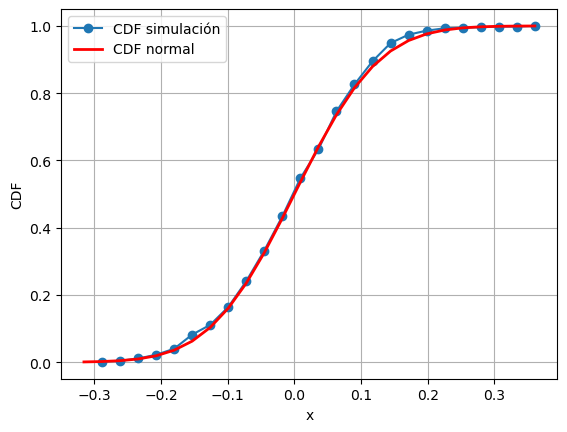

In [250]:
#CDF
plt.plot(bins[1:], count.cumsum()/np.sum(count), 'o-', label='CDF simulación')
plt.plot(bins, norm.cdf(bins, mu, sigma), linewidth=2, color='r', label='CDF normal')
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

El CDF nos permite conocer la probabilidad de obtener un valor dentro de un rango:

In [251]:
#Probabilidad entre -sigma y 0
norm.cdf(0, mu, sigma)-norm.cdf(-sigma, mu, sigma)

0.3413447460685429

In [252]:
#Prob. de obtener un valor alrededor de una desv. estándar de la media
norm.cdf(sigma, mu, sigma)-norm.cdf(-sigma, mu, sigma)

0.6826894921370859

In [253]:
#probabilidad en el rango de 3 sigmas
norm.cdf(3*sigma, mu, sigma)-norm.cdf(-3*sigma, mu, sigma)

0.9973002039367398

## Método de Monte Carlo
Permite simular un evento probabilísticamente sin necesidad de realizar el desarrollo matemático.  
### Ejemplo
Vamos a calcular la probabilidad de que la suma de lanzar 3 veces un dado sea 10

In [254]:
#simulamos el lanzamiento de 3 dados
s = np.random.choice(np.arange(6)+1, 3, replace=True)
sum(s)


14

In [255]:
#repetimos el lanzamiento n veces
n = 100000
a=np.array([np.random.choice(np.arange(6)+1, 3, replace=True) for i in range(n)])
a.shape

(100000, 3)

In [256]:
#calculamos la suma de cada tirada
sumas = a.sum(axis=1)
sumas.shape

(100000,)

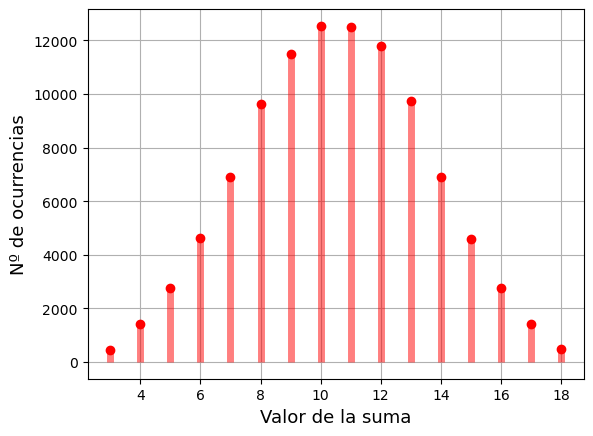

In [257]:
#representamos resultados
counts=pd.Series(sumas).value_counts().sort_index()

plt.plot(counts.index, counts, 'ro', )
plt.vlines(counts.index, 0, counts, colors='r', lw=5, alpha=0.5)
plt.xlabel("Valor de la suma",fontsize=13)
plt.ylabel("Nº de ocurrencias",fontsize=13)
plt.grid()
plt.show()

In [258]:
#Probabilidad de suma=10
counts.loc[10] / n

0.12538

Recuerda que el valor más probable estimado es:

In [259]:
E = sum(1/6*(np.arange(6)+1)) #valor estimado para 1 dado
E * 3 #suma para 3 dados

10.5

### Problema de Monty Python
Vamos a calcular las probabilidades de ganar en el juego de Monty Hall según se cambie o no la puerta mediante simulación.

In [260]:
def juego(cambio):
    """Calcula la probabilidad de ganar en el juego de Monty Hall
    en función de si cambiamos (cambio=1) o no la puerta"""
    P = np.arange(3) #puertas posibles
    E = np.random.choice(3, 1) #puerta elegida
    C = np.random.choice(3, 1) #puerta con el coche, sucesos independientes
    Monty = np.random.choice(np.setdiff1d(P, np.union1d(E, C)), 1) #selección de Monty
    E = E if cambio==0 else np.setdiff1d(P, np.union1d(E, Monty)) #elección final
    
    return(E==C)

Explicación del código de la función

In [261]:
P = np.arange(3) #puertas posibles
P

array([0, 1, 2])

In [262]:
E = np.random.choice(3, 1) #puerta elegida
E

array([0])

In [263]:
C = np.random.choice(3, 1) #puerta con el coche, sucesos independientes
C

array([0])

In [264]:
np.union1d(E, C) #puertas que no puede elegir Monty

array([0])

In [265]:
np.setdiff1d(P, np.union1d(E, C)) #puertas que puede elegir Monty

array([1, 2])

In [266]:
Monty=np.random.choice(np.setdiff1d(P, np.union1d(E, C))) #selección de Monty
Monty

1

In [267]:
np.union1d(E, Monty) #puertas descartadas si se cambia la puerta

array([0, 1])

In [268]:
E == C #resultado final si el jugador NO cambia la puerta

array([ True])

In [269]:
E = np.setdiff1d(P,np.union1d(E, Monty)) #selección final si se cambia la puerta
E

array([2])

In [270]:
E == C #resultado final si el jugador SÍ cambia la puerta

array([False])

Simulamos el juego 1000 veces

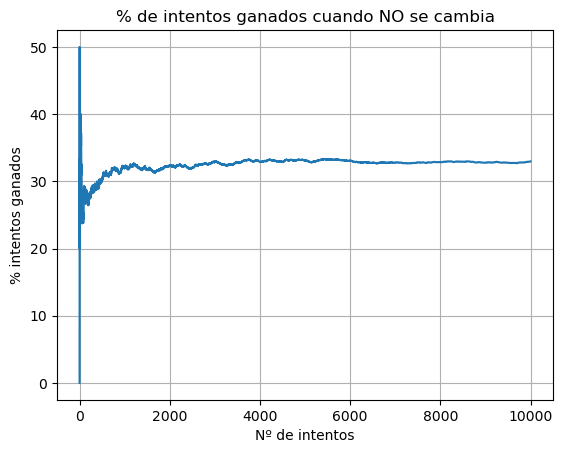

Gana un 32.96% de las veces


In [271]:
N = 10000
ganados = [juego(0) for i in range(N)]
p_ganar = np.sum(ganados) / N

plt.plot(np.cumsum(ganados)*100/(np.arange(N)+1))
plt.xlabel('Nº de intentos')
plt.ylabel('% intentos ganados')
plt.title('% de intentos ganados cuando NO se cambia')
plt.grid()
plt.show()
print(f'Gana un {p_ganar*100:.2f}% de las veces')

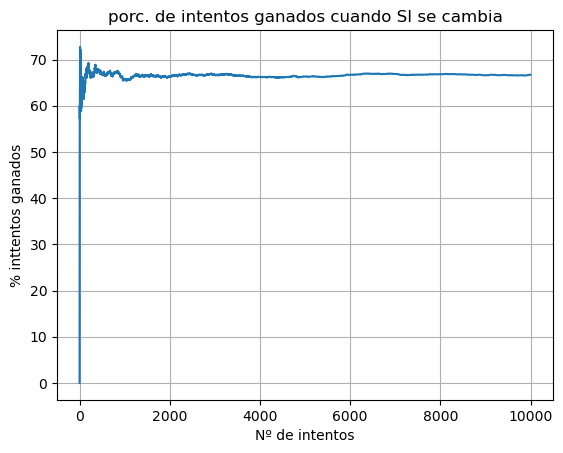

Gana un 66.70% de las veces


In [272]:
N = 10000
ganados = [juego(1) for i in range(N)]
p_ganar = np.sum(ganados) / N

plt.plot(np.cumsum(ganados)*100/(np.arange(N)+1))
plt.xlabel('Nº de intentos')
plt.ylabel('% inttentos ganados')
plt.title('porc. de intentos ganados cuando SI se cambia')
plt.grid()
plt.show()
print(f'Gana un {p_ganar*100:.2f}% de las veces')

### Estimación del valor de Pi
Suponemos que tenemos un círculo de radio $r=1$ dentro de un cuadrado del mismo tamaño. Sabiendo que el área de un círculo tiene el valor $A=\pi \times r^2$,  lanzamos aleatoriamente dardos en toda la superficie del cuadrado, la proporción $p$ de dardos que quedan dentro del cículo deben de ser:
$p=\frac{\pi \times r^2}{(2r)^2}=\frac{\pi}{4}$   
Luego:
$\pi=p \times 4$  

In [273]:
import random as r
import math as m

# Número de dardos que caen dentro del círculo.
inside = 0
# Número total de dardos lanzados.
total = 1000000

# Iteramos para el total de dardos.
for i in range(0, total):
  # Generamos posición del dardo (x, y) en el rango [0, 1] con una distr. uniforme
  
    x = r.random()
    y = r.random()
  # Incrementamos el contador si el dardo cae dentro.
    if m.sqrt(x**2 + y**2) <= 1.0:
        inside += 1

# dentro / total = pi / 4
pi = (float(inside) / total) * 4
pi


3.14126

In [276]:
total=100000000
#Versión vectorizada con numPy
x = np.random.default_rng().uniform(size=total)
y = np.random.default_rng().uniform(size=total)
inside = np.sum(np.sqrt(x**2 + y**2) <= 1.0)
pi = (float(inside) / total) * 4
pi

3.14148308

### Ejercicio
Analizar cómo mejora la precisión de la estimación de $\pi$ al aumentar el nº de dardos en la simulación.  
Para eso hay que crear una función que calcule la estimación de $\pi$ en función del nº de dardos (N) y hacer un barrido de N

In [279]:
#Mejora de la precisión de la simulación con el número de dardos
def calcula_pi(n):
    x = np.random.default_rng().uniform(size=n)
    y = np.random.default_rng().uniform(size=n)
    inside = np.sum(np.sqrt(x**2 + y**2) <= 1.0)
    pi = (float(inside) / n) * 4
    return pi




In [280]:
calcula_pi(100000)

3.12976

In [281]:
#Simulamos entre 1 y 1000 veces
N = 1000
pi_estimado = [calcula_pi(i+1) for i in range(N)]

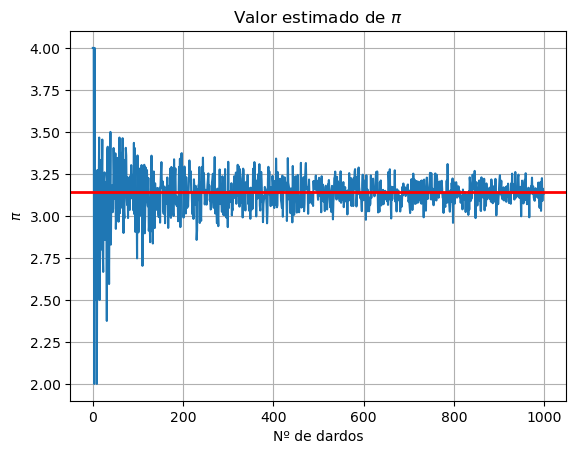

In [282]:
plt.plot(pi_estimado)
plt.xlabel('Nº de dardos')
plt.ylabel('$\pi$')
plt.title('Valor estimado de $\pi$')
plt.axhline(y=np.pi, color='r', linewidth=2)
plt.grid()
plt.show()

In [283]:
N = np.logspace(2, 6, 1000) #escala logarítmica de 100 a 1000000 de simulaciones

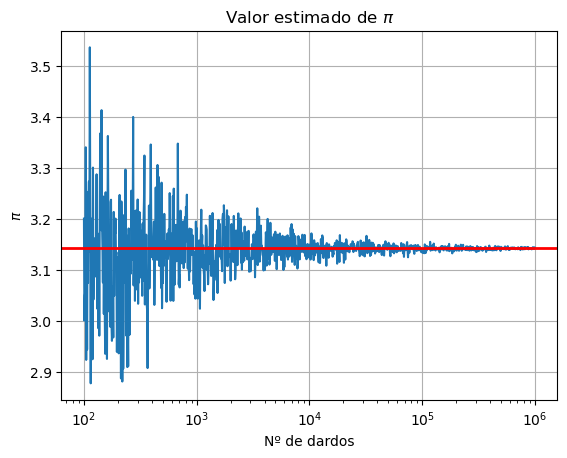

In [284]:
pi_estimado = [calcula_pi(int(i)) for i in N]

plt.semilogx(N, pi_estimado)
plt.xlabel('Nº de dardos')
plt.ylabel('$\pi$')
plt.title('Valor estimado de $\pi$')
plt.axhline(y=np.pi, color='r', linewidth=2)
plt.grid()
plt.show()

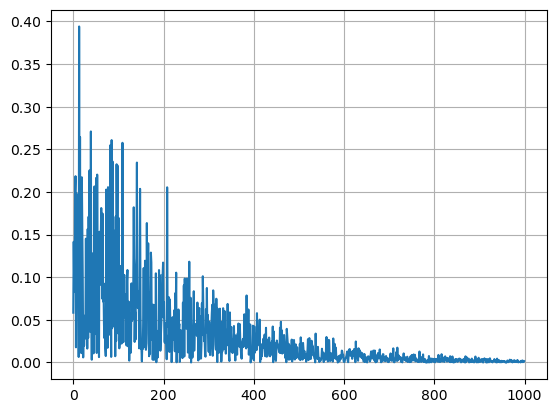

In [285]:
#Representación del error absoluto
plt.plot((np.abs(np.array(pi_estimado)-np.pi)))
plt.grid()
plt.show()

In [286]:
pi_estimado[-1] #valor estimado en la última iteración (N máxima)

3.143156